## Información sobre Uber a partir de datos sobre la oferta y la demanda en las ciudades

### Información sobre el DataSet

El principal problema que Uber intenta resolver es la brecha entre la oferta y la demanda de taxis. El objetivo de este proyecto es analizar los datos sobre Solicitudes de Uber. El conjunto de datos contiene información sobre: 
* Aperturas de Aplicaciones (Eyeballs), 
* No hay coches disponibles (Zeroes), 
* Solicitudes, 
* Viajes Completados, 
* Conductores Únicos, y 
* Tiempo (Local). 

A través del análisis de los datos, podemos encontrar algunas perspectivas importantes.

Se trata de un proyecto táctico cuyo objetivo es mejorar la eficiencia de las operaciones de Uber mediante la identificación de áreas en las que pueden mejorar su servicio. El conjunto de datos proporciona datos de sólo 15 días


* Ceros = Clientes que abren la aplicación y no ven ningún coche en la zona.
* Peticiones = Clientes que solicitan un coche.
* Viaje completado = El punto desde el que se recoge a un cliente.

Utilizando el conjunto de datos proporcionado, responda a las siguientes preguntas:

* ¿Qué fecha tuvo el mayor número de viajes completados durante el periodo de dos semanas?
* ¿Cuál fue el mayor número de viajes completados en un período de 24 horas?
* ¿Cuál fue el mayor número de viajes completados en un período de 24 horas de un conductor?
* ¿A qué hora del día hubo más solicitudes durante el periodo de dos semanas?
* ¿Qué porcentajes de todos los ceros durante el período de dos semanas ocurrieron en fines de semana (viernes a las 5 pm a domingo a las 3 am)?
* Consejo: El valor de la hora local es el inicio de la hora (por ejemplo, 15 es la hora de 15:00 a 16:00)
* ¿Cuál es el ratio medio ponderado de viajes completados por conductor durante el periodo de dos semanas?
Consejo: "Media ponderada" significa que su respuesta debe tener en cuenta el volumen total de viajes en cada hora para determinar el número más exacto en todo el período.
Al elaborar el horario de los conductores en turnos de 8 horas, ¿cuáles son las 8 horas consecutivas de mayor actividad durante el período de dos semanas en términos de solicitudes únicas? 

## Importación de librerias

In [31]:
import pandas as pd
import numpy as np
from numpy import mean, std
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1: Lectura y compreension de los datos

In [32]:
# Se carga el archivo csv en un DataFrame
uber = pd.read_csv("dataset.csv")
uber.shape

(336, 7)

In [33]:
# Se verifica las columnas, dtypes y chequeo de nulos
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [34]:
# Se corrige el tipo de objeto de la columna "Date" en el DataFrame.
uber['Date'] = pd.to_datetime(uber['Date'], format='%d-%b-%y')

In [35]:
# Se verificia si el cambio ha sido realizado
uber.head(8)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,2012-09-10,7,5,0,2,2,9
1,2012-09-10,8,6,0,2,2,14
2,2012-09-10,9,8,3,0,0,14
3,2012-09-10,10,9,2,0,1,14
4,2012-09-10,11,11,1,4,4,11
5,2012-09-10,12,12,0,2,2,11
6,2012-09-10,13,9,1,0,0,9
7,2012-09-10,14,12,1,0,0,9


In [36]:
# Se verifica la presencia de líneas duplicadas.
uber.duplicated().sum() 

0

In [37]:
# Resumo estadistico de los datos
uber.describe()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336,336.00000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2012-09-16 19:00:00,11.50000,19.901786,4.252976,4.062500,5.529762,7.895833
min,2012-09-10 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012-09-13 00:00:00,5.75000,9.000000,1.000000,0.000000,1.000000,3.000000
50%,2012-09-17 00:00:00,11.50000,17.000000,3.000000,2.000000,3.000000,8.000000
75%,2012-09-20 00:00:00,17.25000,25.000000,5.000000,5.000000,6.250000,11.000000
max,2012-09-24 00:00:00,23.00000,99.000000,59.000000,36.000000,46.000000,30.000000
std,NaN,6.93251,16.902862,5.795391,5.672581,7.399416,5.884296


### 2: Análisis exploratorio de datos

#### 2.1 Correlación

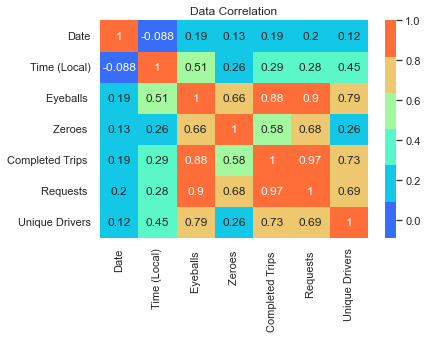

In [38]:
colores = sns.color_palette("rainbow")

# Visualizamos la correlación entre las variables.
plt.figure(figsize = (6, 4))
sns.heatmap(uber.corr(), annot = True, cmap= colores)
plt.title('Data Correlation')
plt.show()

Aquí hay algunas observaciones e ideas sobre la matriz de correlación (insights):

1. **Correlaciones positivas fuertes:**
 Hay correlaciones positivas fuertes entre "Eyeballs", "Zeroes", "Completed Trips", "Requests" y "Unique Drivers". Esto indica que estas variables están positivamente relacionadas entre sí. Por ejemplo, es lógico esperar que a medida que aumentan las solicitudes ("Requests"), también aumenten los viajes completados ("Completed Trips"), el mismo pasa con vizualizar ("Eyeballs") en la aplicación asi que el viaje este completado ("Completed Trips").
   
2. **Correlación negativa con "Time (Local) y Date(dia)":**
Hay una correlación negativa moderada entre "Time (Local), Date y "Eyeballs". Esto podría indicar que la cantidad de personas que abren la aplicación (Eyeballs) puede variar en función de la hora del día, lo que por supuesto el dia y la hora se afectan mutuamente.

3. **Correlación entre "Zeroes" y "Requests":**
Observa la correlación entre "Zeroes" y "Requests". Es interesante que estas dos variables estén correlacionadas positivamente. Podría indicar que, a medida que aumentan las solicitudes, también aumenta la posibilidad de que algunos clientes no encuentren vehículos disponibles.

4. **Correlación fuerte entre "Completed Trips" y "Requests":**
La correlación fuerte entre "Completed Trips" y "Requests" es esperada, ya que, en general, a medida que aumentan las solicitudes, también aumentan los viajes completados.

5. **Correlación con "Unique Drivers":**
"Unique Drivers" parece tener correlaciones significativas con varias otras variables. Esto sugiere que la disponibilidad de conductores únicos puede estar relacionada con la cantidad de solicitudes, viajes completados, etc.

Se vizualiza la distribuición de las variables

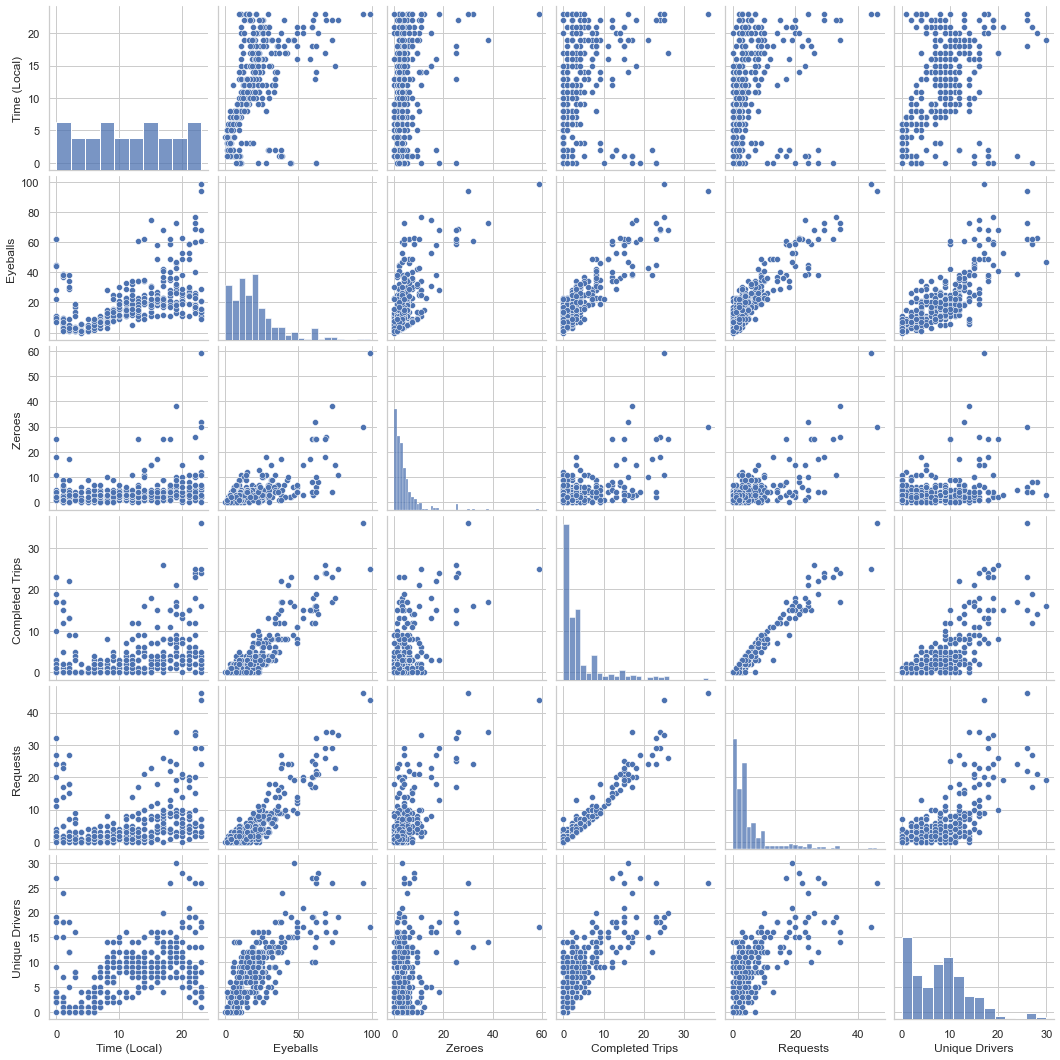

In [39]:
# Vision general de como se distribui las variables en relación al Churn
sns.pairplot(uber, palette= "viridis")

In [40]:
# Realizamos el calculo de semetria
from scipy.stats import skew
number = list(uber.select_dtypes(include=np.number).columns)

# Un valor de 0 indica simetría, un valor negativo indica asimetría negativa, y un valor positivo indica asimetría positiva.
for index, col in enumerate(number, 1):
    print(col, skew(uber[col]))

Time (Local) 0.0
Eyeballs  1.66024207080266
Zeroes  4.610286744135743
Completed Trips  2.295500684631921
Requests  2.488535827991922
Unique Drivers 0.8180810672619898


* Estos valores indican la dirección y la magnitud del sesgo en cada distribución. Un sesgo hacia la derecha significa que la cola derecha de la distribución es más larga, y un sesgo hacia la izquierda significa que la cola izquierda es más larga.

Time (Local): 0.0 (perfectamente simétrico)

Eyeballs: 1.66024207080266 (sesgo hacia la derecha)

Zeroes: 4.610286744135743 (sesgo hacia la derecha)

Completed Trips: 2.295500684631921 (sesgo hacia la derecha)

Requests: 2.488535827991922 (sesgo hacia la derecha)

Unique Drivers: 0.8180810672619898 (sesgo hacia la derecha)


#### 2.2 Valores atipicos

<AxesSubplot:>

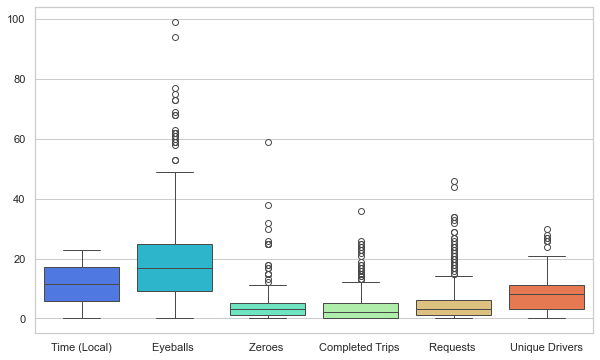

In [41]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(uber, palette="rainbow")

In [42]:
# Se calcula IQR manualmente para encontrar valores atípicos
columnas = ['Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers']
for col in columnas:
    Q1 = uber[col].quantile(0.25)
    Q3 = uber[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = uber[(uber[col] < lower_limit) | (uber[col] > upper_limit)][col]
    
    # Se mostra la cantidad y los valores atípicos por columna
    print(f'Columna: {col}, Total de valores atípicos: {len(outliers)}')


Columna: Eyeballs , Total de valores atípicos: 23
Columna: Zeroes , Total de valores atípicos: 18
Columna: Completed Trips , Total de valores atípicos: 32
Columna: Requests , Total de valores atípicos: 36
Columna: Unique Drivers, Total de valores atípicos: 8


Los valores atípicos podrían representar eventos inusuales o situaciones excepcionales en los datos. Dado que se trata de datos de oferta y demanda, es posible que en algún período haya habido más demanda de la que suele presentarse. Por ejemplo, esto podría deberse a un día festivo u otros momentos significativos que merezcan una atención especial. Se procederá a investigar y comprender el contexto detrás de estos eventos.

#### Comparación con Estadísticas Descriptivas

In [43]:
# Estadísticas descriptivas con valores atípicos
stats_with_outliers = uber['Eyeballs '].describe()

# Filtra los valores atípicos
outliers = uber[(uber['Eyeballs '] < lower_limit) | (uber['Eyeballs '] > upper_limit)]['Eyeballs ']

# Estadísticas descriptivas sin valores atípicos
stats_without_outliers = uber[~uber['Eyeballs '].isin(outliers)]['Eyeballs '].describe()

# Imprime las estadísticas
print("Estadísticas con valores atípicos:")
print(stats_with_outliers)

print("\nEstadísticas sin valores atípicos:")
print(stats_without_outliers)

Estadísticas con valores atípicos:
count    336.000000
mean      19.901786
std       16.902862
min        0.000000
25%        9.000000
50%       17.000000
75%       25.000000
max       99.000000
Name: Eyeballs , dtype: float64

Estadísticas sin valores atípicos:
count    243.000000
mean      11.773663
std        6.888291
min        0.000000
25%        6.000000
50%       11.000000
75%       18.000000
max       23.000000
Name: Eyeballs , dtype: float64


#### Observaciones:

* La media disminuye significativamente cuando se eliminan los valores atípicos, lo cual es esperado ya que la media es sensible a los valores extremos.
* La desviación estándar también disminuye, indicando que la dispersión de los datos es menor sin los valores atípicos.
* Los valores mínimo y máximo no cambian, ya que estos son estadísticas que no se ven afectadas por la presencia o ausencia de valores atípicos.
* Los cuartiles también cambian, reflejando cómo la distribución de los datos se ve afectada al eliminar los valores atípicos.

#### 2.3 Investigación temporal

##### Analisis temporal de Eyeballs y outliers

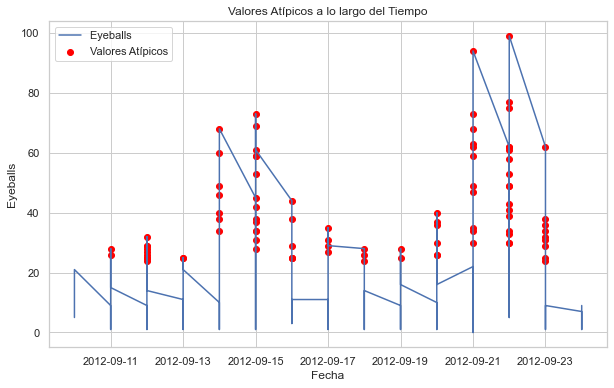

In [44]:
# Visualización de los valores atípicos a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(uber['Date'], uber['Eyeballs '], label='Eyeballs ')

# Selecciona las filas con valores atípicos
outliers_indices = uber.index.isin(outliers.index)
plt.scatter(uber.loc[outliers_indices, 'Date'], uber.loc[outliers_indices, 'Eyeballs '], color='red', label='Valores Atípicos')

plt.title('Valores Atípicos a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Eyeballs')
plt.legend()
plt.show()


##### Analisis temporal de Zeroes y outliers

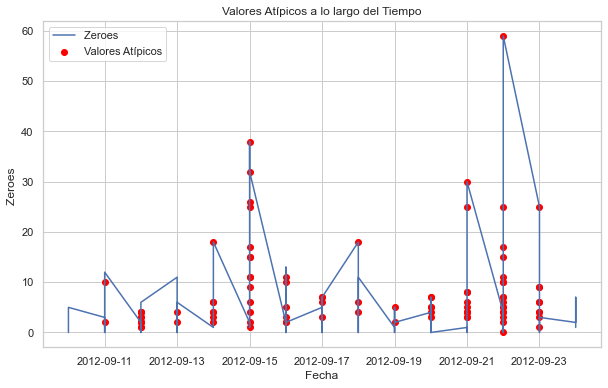

In [45]:
# Visualización de los valores atípicos a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(uber['Date'], uber['Zeroes '], label='Zeroes ')

# Se selecciona las filas con valores atípicos
outliers_indices = uber.index.isin(outliers.index)
plt.scatter(uber.loc[outliers_indices, 'Date'], uber.loc[outliers_indices, 'Zeroes '], color='red', label='Valores Atípicos')

plt.title('Valores Atípicos a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Zeroes ')
plt.legend()
plt.show()

#### Analisis de Serie temporal (Requests)

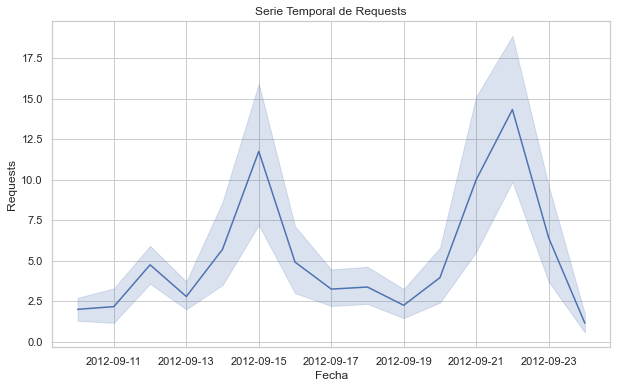

In [46]:
# Visualización de la serie temporal
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Requests ', data=uber)
plt.title('Serie Temporal de Requests')
plt.xlabel('Fecha')
plt.ylabel('Requests')
plt.show()

Los gráficos que estás describiendo representan series temporales de dos variables ('Eyeballs' y 'Zeroes') a lo largo del tiempo, con la superposición de los valores atípicos en esos puntos específicos. Aquí hay una interpretación y conexión entre los dos gráficos:

##### Gráfico de 'Eyeballs':

- **Picos en los Días 21 y 22:** Muestra dos picos pronunciados en los días 21 y 22. Estos picos indican que en esos días hubo un aumento significativo en el número de clientes que abrieron la aplicación ('Eyeballs').

- **Valores Atípicos (Outliers):** Se han destacado en rojo en el gráfico. Estos outliers coinciden con los picos en los días 21 y 22, lo que sugiere que los valores atípicos se deben a un número inusualmente alto de clientes abriendo la aplicación en esos días.

##### Gráfico de 'Zeroes':

- **Picos en los Días 21 y 22:** Al igual que en el gráfico de 'Eyeballs', hay picos en los días 21 y 22. Estos picos indican que en esos días hubo un aumento significativo en la cantidad de veces que los usuarios abrieron la aplicación y no vieron coches disponibles ('Zeroes').

- **Valores Atípicos (Outliers):** Al igual que en el gráfico anterior, los valores atípicos se destacan en rojo en las puntas de los picos en los días 21. Esto sugiere que los valores atípicos en 'Zeroes' también están relacionados con esos días específicos.

##### Conexión entre los Gráficos:

Ambos gráficos muestran patrones similares en los días 21 y 22, indicando eventos excepcionales que resultaron en un aumento significativo tanto en el número de clientes que abren la aplicación como en la cantidad de veces que los usuarios abren la aplicación y no ven coches disponibles. Los valores atípicos resaltan estos eventos en ambos casos.

La conexión entre los gráficos sugiere que los eventos excepcionales en los días 21 y 22 impactaron tanto en el interés de los usuarios ('Eyeballs') como en la falta de disponibilidad de coches ('Zeroes'). Estos días podrían haber estado relacionados con situaciones especiales, como eventos locales, festivales, conciertos u otras circunstancias que generaron una demanda excepcional en la plataforma de Uber.

Los días con mayor demanda contiene información valiosa sobre patrones específicos de comportamiento del usuario. Eliminar estos valores atípicos podría resultar en la pérdida de información significativa ya que se trata de una variabilidad natural en los datos. Hasta porque la idea principal es suprir la demanda en estos dias atipicos. 

#### Analisis temporal por dias de la semana

In [47]:
# Se crea una nueva columna 'DiaSemana' que contiene el día de la semana (0 = lunes, 6 = domingo)
uber['DiaSemana'] = uber['Date'].dt.dayofweek

# Se mapea los números a nombres de días
dias_semana_nombres = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
uber['DiaSemanaNombre'] = uber['DiaSemana'].map(dias_semana_nombres)

# DataFrame resultante
print(uber[['Date', 'DiaSemana', 'DiaSemanaNombre']])


          Date  DiaSemana DiaSemanaNombre
0   2012-09-10          0           Lunes
1   2012-09-10          0           Lunes
2   2012-09-10          0           Lunes
3   2012-09-10          0           Lunes
4   2012-09-10          0           Lunes
..         ...        ...             ...
331 2012-09-24          0           Lunes
332 2012-09-24          0           Lunes
333 2012-09-24          0           Lunes
334 2012-09-24          0           Lunes
335 2012-09-24          0           Lunes

[336 rows x 3 columns]


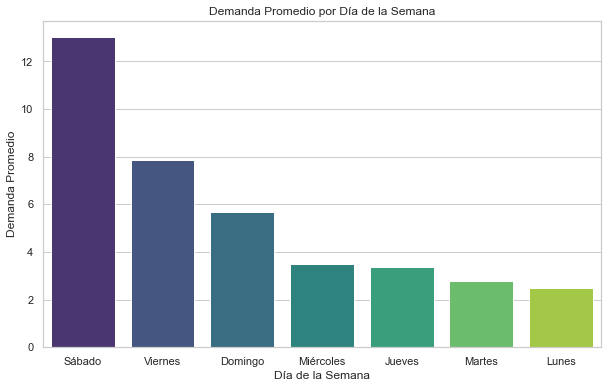

In [48]:
# Se prcede a calcular la demanda promedio por día de la semana
demanda_promedio = uber.groupby('DiaSemanaNombre')['Requests '].mean().sort_values(ascending=False)

# Configura el estilo del gráfico
sns.set(style="whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=demanda_promedio.index, y=demanda_promedio.values, order=demanda_promedio.index, palette="viridis")

# Personaliza el gráfico
plt.title('Demanda Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Demanda Promedio')
plt.show()


Durante el período de estudio, los días de mayor demanda fueron sábado, viernes y domingo. Esto puede deberse a diversos factores, como la disponibilidad de tiempo de las personas durante el fin de semana o la posible realización de eventos o actividades que generen una mayor necesidad de servicios de transporte. La identificación de estos patrones puede ser útil para la planificación y asignación de recursos en el servicio de transporte Uber.

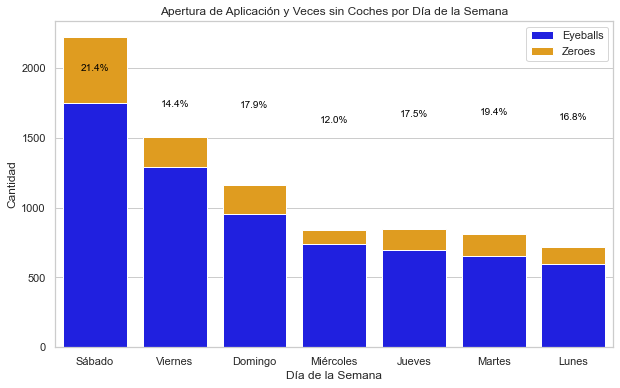

In [49]:
# Se agrupa los datos por día de la semana y suma las cantidades para Eyeballs y Zeroes
grupo_dia_semana = uber.groupby(['DiaSemanaNombre'])[['Eyeballs ', 'Zeroes ']].sum().reset_index()
grupo_dia_semana = grupo_dia_semana.sort_values(by=['Eyeballs ', 'Zeroes '], ascending=False)


# Calculo del porcentaje de Zeroes con respecto al total para cada día
grupo_dia_semana['Porcentaje_Zeroes'] = (grupo_dia_semana['Zeroes '] / (grupo_dia_semana['Eyeballs '] + grupo_dia_semana['Zeroes '])) * 100

# Se configura el estilo del gráfico
sns.set(style="whitegrid")

# Se crea una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras apiladas por días de la semana
sns.barplot(x='DiaSemanaNombre', y='Eyeballs ', data=grupo_dia_semana, color='blue', label='Eyeballs')
sns.barplot(x='DiaSemanaNombre', y='Zeroes ', data=grupo_dia_semana, color='orange', label='Zeroes', bottom=grupo_dia_semana['Eyeballs '])

# Se añade las etiquetas de porcentaje
for i, p in enumerate(ax.patches[len(grupo_dia_semana):]):
    height = p.get_height()
    porcentaje_zeroes = grupo_dia_semana.iloc[i]['Porcentaje_Zeroes']
    # Ajusta la posición vertical en función de la altura de la barra
    vertical_position = height + 90  # Puedes ajustar el valor 0.5 según tus necesidades
    ax.annotate(f'{porcentaje_zeroes:.1f}%', (p.get_x() + p.get_width() / 2., vertical_position),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,200),
                textcoords='offset points')  

# Personalización del gráfico
plt.title('Apertura de Aplicación y Veces sin Coches por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


Los días sábado, viernes y domingo destacan como los de mayor demanda, evidenciándose tanto en la frecuencia de aperturas de la aplicación como en la presencia de un mayor número de solicitudes de servicios. Es interesante observar que el viernes presenta un pico notable del 21.4%, seguido por el martes, que ocupa el sexto lugar con un 19.4%, y el domingo con un 17.9%.

La elevada proporción de ceros (clientes que abren la aplicación y no encuentran coches cercanos) durante el martes, a pesar de ser un día con demanda relativamente baja, podría sugerir que algunos conductores pueden percibir que trabajar en este día no es rentable, lo que plantea la hipótesis de una menor disponibilidad de conductores.

Esta es una interpretación que proporciona una visión detallada de los patrones de demanda y la oferta de conductores en diferentes días de la semana.

### 3: Contestando a las preguntas

* ¿Qué fecha tuvo el mayor número de viajes completados durante el periodo de dos semanas?

In [50]:
uber.columns = uber.columns.str.strip()
uber.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers', 'DiaSemana', 'DiaSemanaNombre'],
      dtype='object')

In [51]:
# Se encuentra la fecha con el mayor número de viajes completados
fecha_max_viajes = uber.loc[uber['Completed Trips'].idxmax(), 'Date']
print(f"La fecha con el mayor número de viajes completados es: {fecha_max_viajes}")

La fecha con el mayor número de viajes completados es: 2012-09-21 00:00:00


Como mencionamos anteriormente al analizar el gráfico de solicitudes, el día 21 se destacó como aquel con el mayor número de viajes solicitados. En consecuencia, tiene sentido que este mismo día también haya registrado la mayor cantidad de viajes completados.

In [52]:
# Calculo del número total de viajes completados y de solicitudes por día de la semana
resumen_diario = uber.groupby('DiaSemanaNombre')[['Completed Trips', 'Requests']].sum()

# Calculo del porcentaje de viajes completados en relación con las solicitudes
resumen_diario['Porcentaje_Completados'] = round((resumen_diario['Completed Trips'] / resumen_diario['Requests']) * 100, 2)

# Se ordena el DataFrame por el porcentaje de vaijes completado de mayor a menor
resumen_diario = resumen_diario.sort_values(by='Porcentaje_Completados', ascending=False)

# Imprime el resultado
resumen_diario

,Completed Trips,Requests,Porcentaje_Completados
DiaSemanaNombre,,,
Viernes,298,377,79.05
Miércoles,132,168,78.57
Domingo,204,272,75.00
Lunes,87,120,72.50
Sábado,447,626,71.41
Jueves,115,162,70.99
Martes,82,133,61.65


Estos resultados  brindan información sobre la eficiencia de completar viajes en diferentes días de la semana en comparación con la cantidad de solicitudes recibidas. Puedes observar que hay variaciones en el porcentaje de completados, lo que podría ser útil para la planificación operativa y la asignación de recursos.

1. **Distribución de Completados vs. Solicitudes:**
   - Viernes y Miércoles tienen una proporción más alta de viajes completados en comparación con las solicitudes. Esto podría indicar una mayor eficiencia operativa en estos días.

2. **Eficiencia Relativa:**
   - Aunque Sábado tiene el mayor número absoluto de Completed Trips, su eficiencia relativa (porcentaje de completados) es menor en comparación con Viernes y Miércoles.

3. **Días de Menor Eficiencia:**
   - Martes tiene el porcentaje más bajo de completados en relación con las solicitudes, lo que podría sugerir desafíos operativos o una mayor demanda que no se está cumpliendo completamente.

4. **Posibles Oportunidades:**
   - Analizar días específicos con tasas de completados más altas puede ayudar a comprender las prácticas operativas exitosas que podrían implementarse en otros días.

5. **Contexto Adicional:**
   - Sería beneficioso contar con más contexto sobre las circunstancias operativas o eventos específicos que podrían haber afectado estas cifras.

En general, este análisis puede ser valioso para tomar decisiones operativas y estratégicas, como asignar recursos adicionales en días de alta demanda o mejorar la eficiencia operativa en días con tasas de completados más bajas.

* ¿Cuál fue el mayor número de viajes completados en un período de 24 horas?

In [53]:
# Agrupa los datos por fecha y suma los viajes completados para cada día:
viajes_completados_diarios = uber.groupby('Date')['Completed Trips'].sum()

#Encuentra la fecha con el mayor número de viajes completados:
fecha_max_completados = viajes_completados_diarios.idxmax()
max_completados = viajes_completados_diarios.max()

print(f"Dia con el mayor numero de viajes completados:{fecha_max_completados} total de viajes completados en este dia: {max_completados}")

Dia con el mayor numero de viajes completados:2012-09-22 00:00:00 total de viajes completados en este dia: 248


* ¿Cuál fue el mayor número de viajes completados en un período de 24 horas de un conductor?

In [54]:
# Se agrupa los datos por fecha y se suma los viajes completados y los conductores únicos para cada día
viajes_completados_diarios = uber.groupby('Date')[['Completed Trips', 'Unique Drivers']].sum()

# Calcula el número de viajes completados por conductor para cada día
viajes_por_conductor_diarios = viajes_completados_diarios['Completed Trips'] / viajes_completados_diarios['Unique Drivers']

# Se encuentra la fecha con el mayor número de viajes completados por conductor
fecha_max_completados_por_conductor = viajes_por_conductor_diarios.idxmax()
max_completados_por_conductor = viajes_por_conductor_diarios.max()
print(f"Fecha con el mayor numero de viajes completados por conductor {fecha_max_completados_por_conductor} con maximo completado por condutor: {max_completados_por_conductor}")

Fecha con el mayor numero de viajes completados por conductor 2012-09-15 00:00:00 con maximo completado por condutor: 1.0310880829015545


* ¿A qué hora del día hubo más solicitudes durante el periodo de dos semanas?

In [55]:
# Se agrupa los datos por hora del dia y se suma las solicitudes
solicitudes_por_hora = uber.groupby('Time (Local)')['Requests'].sum()

# Se encuentra la hora el dia com mas solicitudes
hora_max_solicitudes = solicitudes_por_hora.idxmax()
max_solicitudes = solicitudes_por_hora.max()

print(f"La hora del día con más solicitudes es {hora_max_solicitudes} con {max_solicitudes} solicitudes.")

La hora del día con más solicitudes es 23 con 184 solicitudes.


* ¿Qué porcentajes de todos los ceros durante el período de dos semanas ocurrieron en fines de semana (viernes a las 5 pm a domingo a las 3 am)?

In [56]:
weekend_data = uber[
    (
        ((uber['DiaSemanaNombre'] == 'Viernes') & (uber['Time (Local)'] >= 17)) |
         (uber['DiaSemanaNombre'] == 'Sábado')) |
        ((uber['DiaSemanaNombre'] == 'Domingo') & (uber['Time (Local)'] <= 3))
    ]

# Conteo de zeroes a los finde de semana
weekend_zeroes = weekend_data['Zeroes'].sum()

# Conteo de zeroes durante todo el periodo de dos semanas
al_zeros = uber['Zeroes'].sum()

# Calculo del porcentaje
porcentaje_weekend_zeroes = round((weekend_zeroes / al_zeros) *100, 2)

print(f"Porcentaje de ceros durante los fines de semana (desde el viernes a las 5 pm hasta el domingo a las 3 am): {porcentaje_weekend_zeroes:.2f}%")

Porcentaje de ceros durante los fines de semana (desde el viernes a las 5 pm hasta el domingo a las 3 am): 45.07%


* ¿Cuál es el ratio medio ponderado de viajes completados por conductor durante el periodo de dos semanas?

In [57]:
# Paso 1: Calcular el total de viajes completados y conductores únicos por día
viajes_conductores_diarios = uber.groupby('Date')[['Completed Trips', 'Unique Drivers']].sum()

# Paso 2: Calcular el ratio de viajes completados por conductor para cada día
viajes_conductores_diarios['Ratio Viajes/Conductor'] = viajes_conductores_diarios['Completed Trips'] / viajes_conductores_diarios['Unique Drivers']

# Paso 3: Calcular el promedio ponderado de los ratios durante el período de dos semanas
promedio_ponderado = (viajes_conductores_diarios['Ratio Viajes/Conductor'] * viajes_conductores_diarios['Unique Drivers']).sum() / viajes_conductores_diarios['Unique Drivers'].sum()

print(f"El ratio medio ponderado de viajes completados por conductor durante el período de dos semanas es: {promedio_ponderado:.2f}")

El ratio medio ponderado de viajes completados por conductor durante el período de dos semanas es: 0.51


* Al elaborar el horario de los conductores en turnos de 8 horas, ¿cuáles son las 8 horas consecutivas de mayor actividad durante el período de dos semanas en términos de solicitudes únicas? 

In [58]:
# Se ponela columna 'Time (Local)' en un formato de tiempo adecuado
uber['Time (Local)'] = pd.to_datetime(uber['Time (Local)'], format='%H')

# Se agrupa por hora y calcula la suma de solicitudes únicas
actividad_por_hora = uber.groupby('Time (Local)')['Requests'].sum()

# Se encuentra la ventana de 8 horas con la mayor suma de solicitudes únicas
ventana_mayor_actividad = actividad_por_hora.rolling(window=8, min_periods=1).sum().idxmax()

# Muestra la ventana de 8 horas y la cantidad de solicitudes únicas en ese periodo
print(f"Las 8 horas consecutivas de mayor actividad son de {ventana_mayor_actividad.hour} a {(ventana_mayor_actividad + pd.DateOffset(hours=7)).hour}:00")
print(f"Cantidad de solicitudes únicas en ese periodo: {actividad_por_hora.loc[ventana_mayor_actividad:ventana_mayor_actividad + pd.DateOffset(hours=7)].sum()}")

Las 8 horas consecutivas de mayor actividad son de 23 a 6:00
Cantidad de solicitudes únicas en ese periodo: 184
